In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

games = pd.read_csv("data/games.csv")

games

,Away_Team,Home_Team,Date,Ref_Crew,Accepted_Count,Yards,Away_Count,Away_Yards,Home_Count,Home_Yards,Total_Flags,Week,Year
0,Tennessee,Pittsburgh,09/10/2009,Bill Leavy,11,88,5,28,6,60,13,1,2009
1,Miami,Atlanta,09/13/2009,Walt Coleman,8,62,4,27,4,35,11,1,2009
2,Kansas City,Baltimore,09/13/2009,Gene Steratore,11,80,3,15,8,65,14,1,2009
3,Philadelphia,Carolina,09/13/2009,Jeff Triplette,14,106,9,76,5,30,14,1,2009
4,Denver,Cincinnati,09/13/2009,Jerome Boger,10,66,6,39,4,27,12,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,Cleveland,Washington,01/01/2023,Bill Vinovich,8,44,3,20,5,24,11,17,2022
3578,San Francisco,Las Vegas,01/01/2023,Clay Martin,15,120,9,71,6,49,16,17,2022
3579,N.Y. Jets,Seattle,01/01/2023,Ron Torbert,7,35,2,10,5,25,7,17,2022
3580,Minnesota,Green Bay,01/01/2023,Carl Cheffers,9,65,6,35,3,30,11,17,2022


In [42]:
# change date string to date object
games['Date'] = pd.to_datetime(games['Date']);

# get rid of things older than 10 years
games = games[games['Date'] >= pd.to_datetime('2014-01-01')]

games = games.reset_index(drop=True)

games


,Away_Team,Home_Team,Date,Ref_Crew,Accepted_Count,Yards,Away_Count,Away_Yards,Home_Count,Home_Yards,Total_Flags,Week,Year
0,Oakland,Jacksonville,2016-10-23,Jeff Triplette,24,239,11,117,13,122,35,7,2016
1,Oakland,Tampa Bay,2016-10-30,Terry McAulay,29,264,23,200,6,64,34,8,2016
2,Las Vegas,Dallas,2021-11-25,Shawn Hochuli,28,276,14,110,14,166,33,12,2021
3,Chicago,San Francisco,2014-09-14,Carl Cheffers,26,176,10,58,16,118,33,2,2014
4,Tennessee,Detroit,2016-09-18,Brad Allen,29,221,12,83,17,138,31,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,Buffalo,N.Y. Jets,2017-01-01,Jeff Triplette,2,15,0,0,2,15,4,17,2016
2298,Arizona,Seattle,2018-12-30,Ron Torbert,4,30,3,20,1,10,4,17,2018
2299,Minnesota,Seattle,2019-12-02,Clete Blakeman,4,60,3,30,1,30,4,13,2019
2300,Tennessee,Green Bay,2020-12-27,Brad Allen,3,15,3,15,0,0,3,16,2020


Text(0, 0.5, 'Mean Flags per Game')

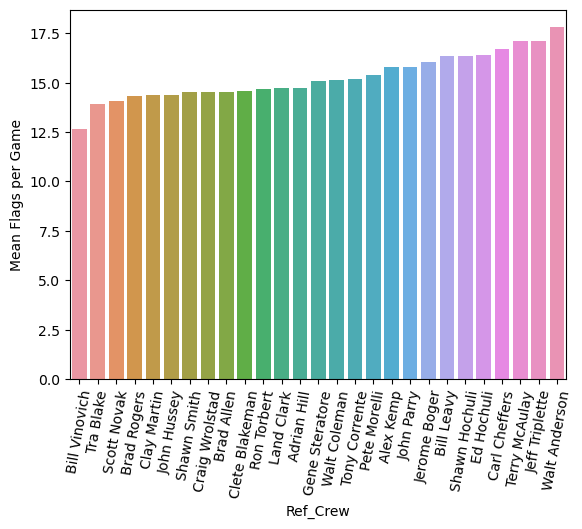

In [46]:
crew_flags_sum = games.groupby('Ref_Crew')['Total_Flags'].mean().reset_index()

sorted_by_total = crew_flags_sum.sort_values(by='Total_Flags')

sns.barplot(x=sorted_by_total['Ref_Crew'], y=sorted_by_total['Total_Flags'])
plt.xticks(rotation=80)
plt.ylabel('Mean Flags per Game')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Week', ylabel='Total_Flags'>

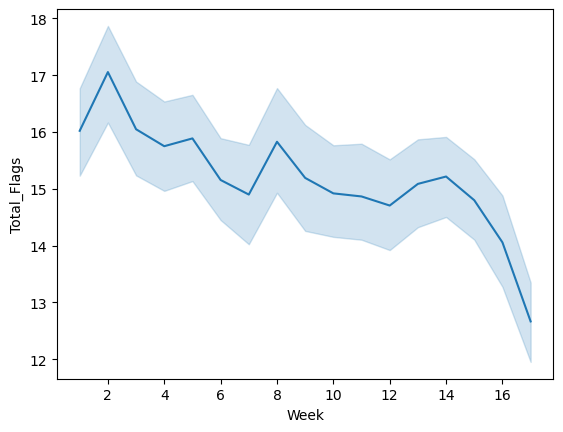

In [54]:
sns.lineplot(x=games['Week'], y=games['Total_Flags'])

In [57]:
penalties = pd.read_csv("data/penalties.csv")

penalties = penalties[penalties['Year'] >= 2014]

penalties

,Name,Count,Yards,Declined,Offsetting,Home_Count,Away_Count,Off_Count,Def_Count,ST_Count,Week,Year
6120,Chop Block,1,15,0,0,0,1,0,0,1,1,2014
6121,Clipping,0,0,0,0,0,0,0,0,0,1,2014
6122,Defensive 12 On-field,1,5,0,0,1,0,0,1,0,1,2014
6123,Defensive Delay of Game,0,0,0,0,0,0,0,0,0,1,2014
6124,Defensive Holding,15,76,9,1,5,10,0,15,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
17131,Short Free Kick,0,0,0,0,0,0,0,0,0,17,2022
17132,Taunting,0,0,0,0,0,0,0,0,0,17,2022
17133,Tripping,1,10,0,0,1,0,1,0,0,17,2022
17134,Unnecessary Roughness,3,33,0,0,1,2,0,3,0,17,2022


In [93]:
team = pd.read_csv("data/team.csv")
unique_teams = team['Beneficiary'].unique()

team

,Against,Beneficiary,Date,Ref_Crew,Total_Count,Total_Yards,Off_Count,Off_Yards,Def_Count,Def_Yards,ST_Count,ST_Yards,Pre-Snap,Off_Pre-Snap,Def_Pre-Snap,ST_Pre-Snap,Declined,Offsetting,Week,Year
0,Pittsburgh,Tennessee,09/10/2009,Bill Leavy,6,60,4,30,2,30,0,0,2,2,0,0,0,1,1,2009
1,Tennessee,Pittsburgh,09/10/2009,Bill Leavy,5,28,3,13,1,5,1,10,4,3,1,0,0,1,1,2009
2,Miami,Atlanta,09/13/2009,Walt Coleman,4,27,2,20,2,7,0,0,1,0,1,0,1,1,1,2009
3,Atlanta,Miami,09/13/2009,Walt Coleman,4,35,2,25,2,10,0,0,2,0,2,0,0,1,1,2009
4,Baltimore,Kansas City,09/13/2009,Gene Steratore,8,65,4,29,2,18,2,18,1,1,0,0,1,1,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,San Francisco,Philadelphia,01/29/2023,John Hussey,11,81,3,15,6,41,2,25,3,3,0,0,1,1,conference-championship,2022
7469,Cincinnati,Kansas City,01/29/2023,Ron Torbert,9,71,5,38,3,28,1,5,2,2,0,0,0,0,conference-championship,2022
7470,Kansas City,Cincinnati,01/29/2023,Ron Torbert,4,55,2,25,1,20,1,10,0,0,0,0,1,0,conference-championship,2022
7471,Kansas City,Philadelphia,02/12/2023,Carl Cheffers,3,14,1,5,2,9,0,0,3,1,2,0,1,0,super-bowl,2022


In [97]:
# look at who benefited for each ref 
# graphs for *each team*
# penalties per game
# yards
# effective penalties (accepted? offsetting?)
unique_teams = pd.DataFrame(unique_teams, columns=['Beneficiary'])

group_by_ref = team.groupby('Ref_Crew')

ref_name_dfs = {}

for ref_name, group in group_by_ref:
    beneficiary_group = group.groupby('Beneficiary').agg(
        total_flags_sum=('Total_Count', 'sum'),
        beneficiary_count=('Beneficiary', 'size')
    ).reset_index()

    #merge w/ unique teams
    beneficiary_group = pd.merge(unique_teams, beneficiary_group, on='Beneficiary', how='left')

    #fill empty values
    beneficiary_group['total_flags_sum'].fillna(0, inplace=True)
    beneficiary_group['beneficiary_count'].fillna(0, inplace=True)

    beneficiary_group['Beneficiary'] = unique_teams

    beneficiary_group['Average_Flags_Per_Game'] = beneficiary_group['total_flags_sum'] / beneficiary_group['beneficiary_count']

    ref_name_dfs[ref_name] = beneficiary_group

ref_name_dfs['Bill Leavy']

,Beneficiary,total_flags_sum,beneficiary_count,Average_Flags_Per_Game
0,Tennessee,32.0,5.0,6.400000
1,Pittsburgh,44.0,8.0,5.500000
2,Atlanta,52.0,10.0,5.200000
3,Miami,35.0,6.0,5.833333
4,Kansas City,40.0,6.0,6.666667
5,Baltimore,46.0,7.0,6.571429
6,Carolina,28.0,5.0,5.600000
7,Philadelphia,21.0,3.0,7.000000
8,Denver,23.0,5.0,4.600000
9,Cincinnati,46.0,6.0,7.666667


/var/folders/_b/1m5cvj8s0njdz8qhb3v5thwm0000gn/T/ipykernel_54852/131230430.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 2)) # Create new figure


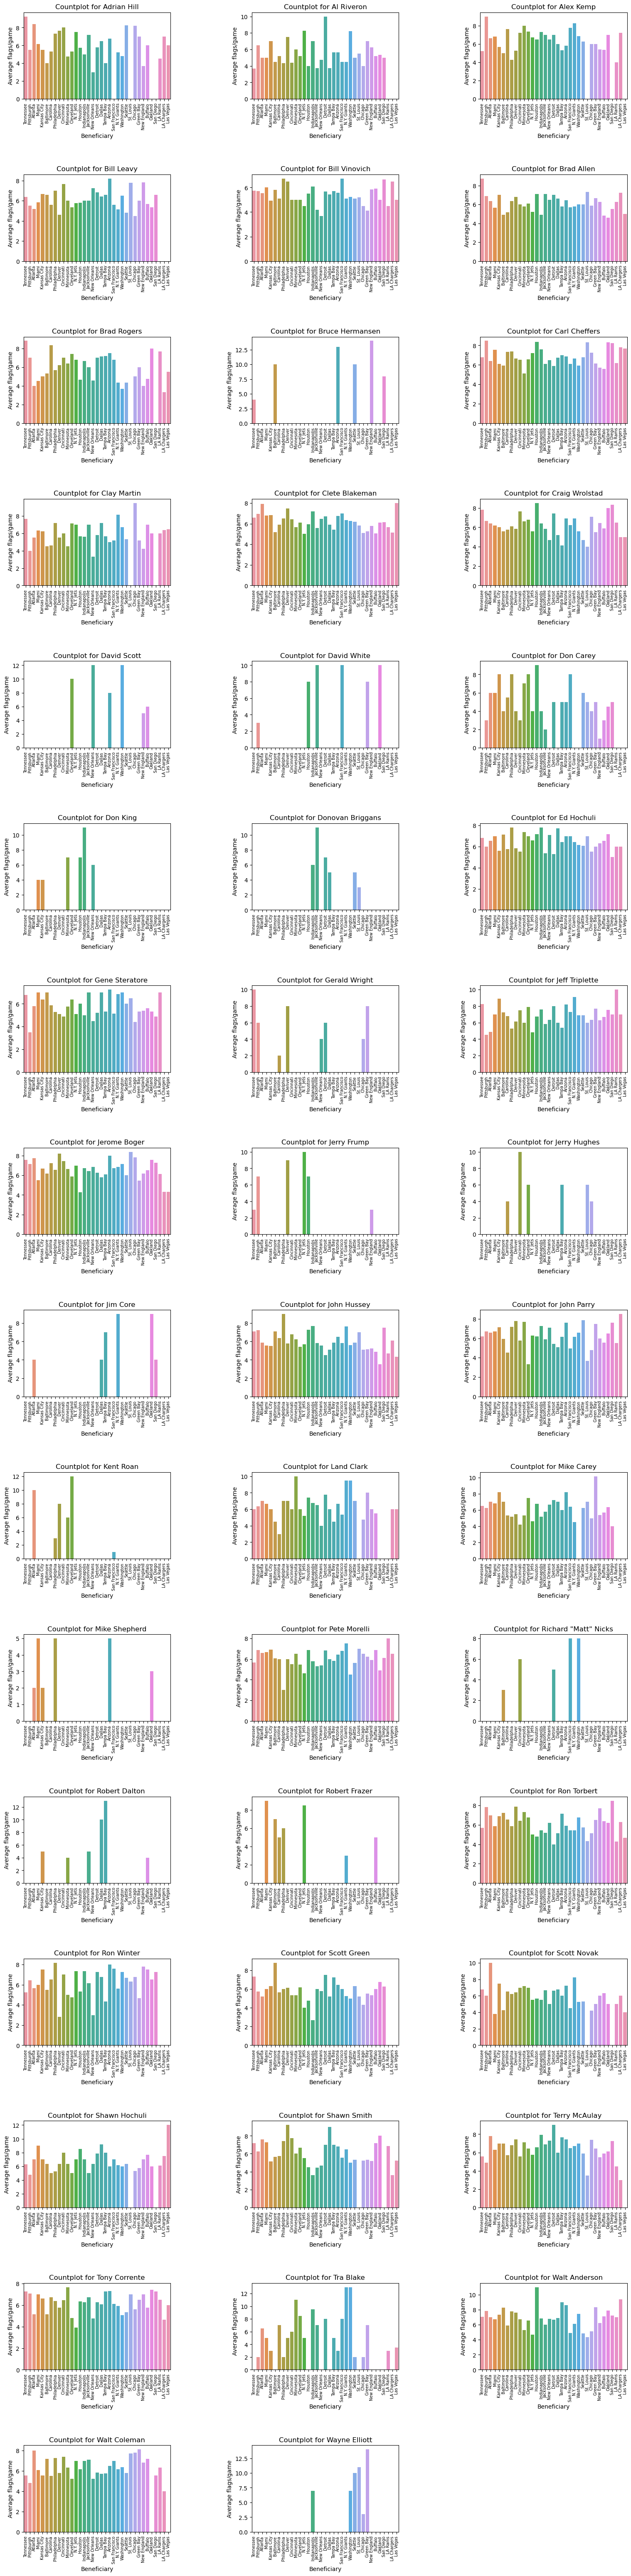

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

<Figure size 300x200 with 0 Axes>

In [140]:
import math
num_rows = math.ceil(len(ref_name_dfs) / 3)

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4*num_rows))
fig.tight_layout(pad=11.0)
axes = axes.flatten()

for idx, (ref_name, df) in enumerate(ref_name_dfs.items()):
    plt.figure(figsize=(3, 2)) # Create new figure

    sns.barplot(data=df, x='Beneficiary', y='Average_Flags_Per_Game', ax=axes[idx])
    axes[idx].set_title(f'Countplot for {ref_name}')
    axes[idx].set_xlabel('Beneficiary')
    axes[idx].set_ylabel('Average flags/game')
    axes[idx].tick_params(axis='x', rotation=90, labelsize=7)

# Hide any unused subplots
for ax in axes[len(ref_name_dfs):]:
    ax.set_visible(False)

plt.show()


In [121]:
from scipy import stats

flags_data = [] #store flags data for each dataframe

for ref_name, df in ref_name_dfs.items():
    flags = df['Average_Flags_Per_Game'].dropna()
    flags_data.append(flags)

h_stat, p_value = stats.kruskal(*flags_data)

print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Significant difference among the referee crews.")
else:
    print("No significant difference among the referee crews.")

Kruskal-Wallis H-statistic: 131.1633692480153, P-value: 4.0688319750159053e-10
Significant difference among the referee crews.


In [141]:
def check_dif(ref_name):
    flags_data = []

    for team in ref_name_dfs[ref_name]:
        flags = ref_name_dfs[ref_name]['Average_Flags_Per_Game'].dropna()
        flags_data.append(flags)

    #print(flags_data)

    h_stat, p_value = stats.kruskal(*flags_data)

    print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

    # Interpret the result
    print(ref_name)
    if p_value < 0.05:
        print("Significant difference among the referee crews.")
    else:
        print("No significant difference among flags per game for each team.")


In [142]:
for ref_name in list(ref_name_dfs.keys()):
    check_dif(ref_name)

Kruskal-Wallis H-statistic: 0.0, P-value: 1.0
Adrian Hill
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 0.0, P-value: 1.0
Al Riveron
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 0.0, P-value: 1.0
Alex Kemp
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 0.0, P-value: 1.0
Bill Leavy
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 5.710289232575063e-14, P-value: 1.0
Bill Vinovich
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 5.694278327675091e-14, P-value: 1.0
Brad Allen
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 5.697809495256506e-14, P-value: 1.0
Brad Rogers
No significant difference among flags per game for each team.
Kruskal-Wallis H-statistic: 0.0, P-value: 1.0
Bruce Hermansen
No significant difference among flags per game 